# Preprocess and Sanity Check

In [1]:
%cd ../
%config InlineBackend.figure_format='retina'

import logging
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from IPython.core.getipython import get_ipython
from src.canonical_analysis.subspace_comm import CCARegions
from src.spikeloader import SpikeLoader

sns.set()
get_ipython().run_line_magic("config", "InlineBackend.figure_format='retina'")

/groups/stringer/home/josephs2/janelia2020


In [2]:
# logging.getLogger().setLevel(logging.INFO)
path_npz = '/groups/stringer/home/josephs2/data/text32_500_TX59_2020_08_18_coding_neurons.npz'
path_img = '/groups/pachitariu/pachitariulab/data/STIM/text32_500.mat'

In [3]:
# Parameters
path_npz = (
    "/groups/pachitariu/pachitariulab/datasets/v1RF/text32_500_TX57_2020_08_18.npz"
)
path_hdf5 = "/groups/stringer/home/josephs2/data/text32_500_TX57_2020_08_18.hdf5"
path_img = "/groups/pachitariu/pachitariulab/data/STIM/text32_500.mat"
path_loader = "/groups/stringer/home/josephs2/data/text32_500_TX57_2020_08_18.hdf5"
path_rf = "/groups/stringer/home/josephs2/data/text32_500_TX57_2020_08_18.hdf5"
path_gabor = "/groups/stringer/home/josephs2/data/text32_500_TX57_2020_08_18.hdf5"


In [4]:
load_hdf5=True
out_file=path_hdf5
if Path(Path(out_file).with_suffix(".hdf5")).exists() and load_hdf5:
    logging.info("HDF5 exists, loading.")
    loader = SpikeLoader.from_hdf5(out_file, path_img)
else:
    logging.info("Reading from npz.")
    loader = SpikeLoader.from_npz(path_npz, path_img)
    logging.info("Saving to HDF5.")
    loader.save(out_file, overwrite=True)

dict_keys(['cls', 'path', 'load_prev_run', 'kwargs'])
<class 'src.spikeloader.SpikeLoader'>
/groups/stringer/home/josephs2/data/text32_500_TX57_2020_08_18.hdf5
/groups/pachitariu/pachitariulab/data/STIM/text32_500.mat
{}


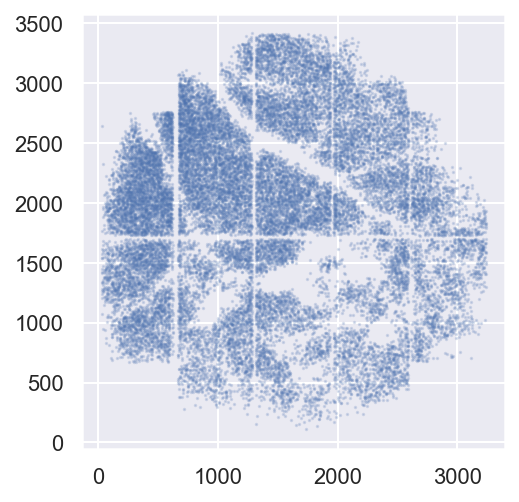

In [5]:
fig, ax = plt.subplots()
ax.scatter(loader.pos.x, loader.pos.y, s=0.5, alpha=0.2)
ax.set_aspect("equal")

In [6]:
try:
    print(f"(Stim x Neu): {loader.spks.shape}")
    print(f"Number of spont frames: {loader.idx_spont.size}")
    print(f"Repeated stims: {loader.get_idx_rep().shape}")
except:
    pass 

(Stim x Neu): (26752, 26962)


idx_spont [    0     1     3 ... 26746 26748 26750]
Number of spont frames: 14311
Repeated stims: (840, 2)


### Correlations between the spiking responses of repeated and non-repeated stimuli.

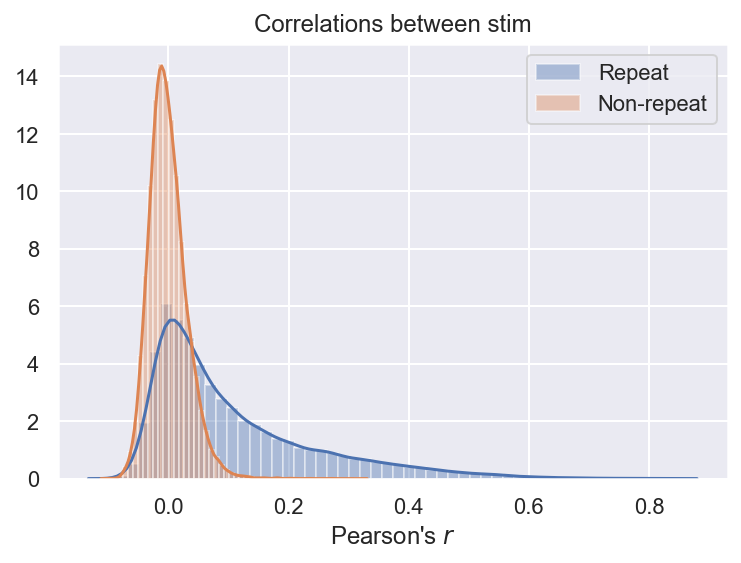

In [7]:
def corr_check(idx1, idx2, name):
    corr = CCARegions.pairwise_inner_prod(loader.S[idx1, :], loader.S[idx2, :], normalize=True)
    ax = sns.distplot(corr, label=name)
    ax.set_title("Correlations between stim")
    ax.set_xlabel("Pearson's $r$")
    return ax


rep = loader.get_idx_rep()
corr_check(rep[:1000, 0], rep[:1000, 1], "Repeat")
corr_check(np.arange(1000), np.arange(1000, 2000), "Non-repeat")
plt.legend()